In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
if os.getcwd().endswith('notebook'):
    os.chdir('..')
print(f'current working directory: {os.getcwd()}')

current working directory: /Users/howechen/Project/ntu_sd6103_team_project/ntu_sd6103_data_systems_team_project


In [13]:
df1 = pd.read_excel('data/Experiment_record_part2.xlsx')
df2 = pd.read_excel('data/Experiment_record_part3.xlsx')
df1.index = df1['Query']
df1.drop('Query', axis=1, inplace=True)
df1.drop('Complexity', axis=1, inplace=True)
df2.index = df2['Query']
df2.drop('Query', axis=1, inplace=True)
df2.drop('Complexity', axis=1, inplace=True)

In [14]:
df1.head()

,Time(s),1/2 Time(s),1/4 Time(s)
Query,,,
Q1,17.5,1.800,1.000
Q2,1.7,1.200,0.467
Q3,1.1,0.941,0.365
Q4,23.4,9.800,5.100
Q5,24.6,3.600,1.600


In [15]:
df2.head()

,Full Time(s),Indexed Full Time(s)
Query,,
Q1,17.5,1.5
Q2,1.7,1.4
Q3,1.1,1.1
Q4,23.4,20.5
Q5,24.6,12.4


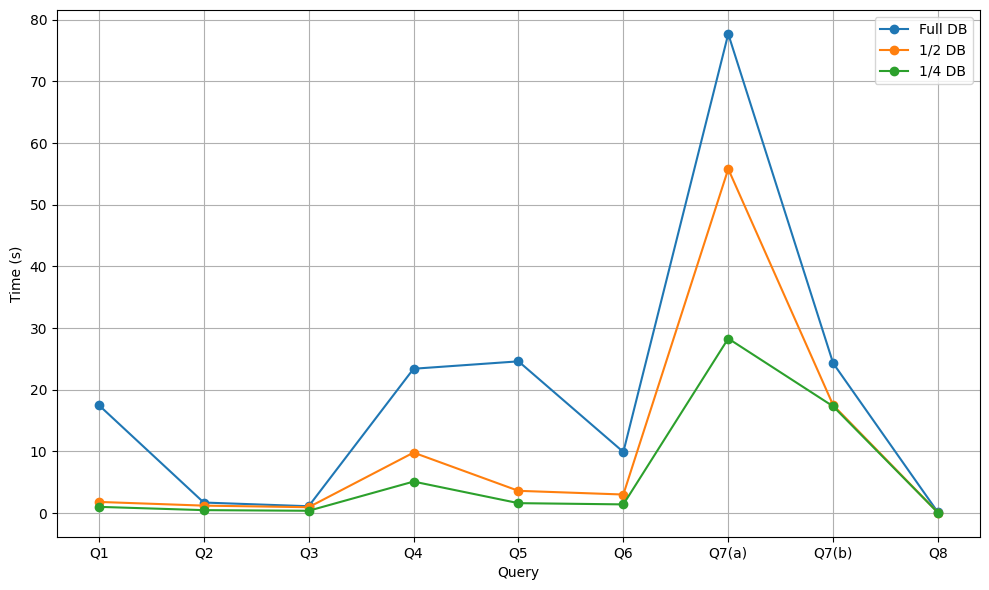

In [34]:
# 绘制折线图
plt.figure(figsize=(10, 6))
labels = ['Full DB', '1/2 DB', '1/4 DB']
for col in df1.columns:
    plt.plot(df1.index, df1[col], marker='o', label=labels.pop(0))

# 添加图例和标签
# plt.title("Comparison of Time Cost")
plt.xlabel("Query")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 展示图形
plt.show()

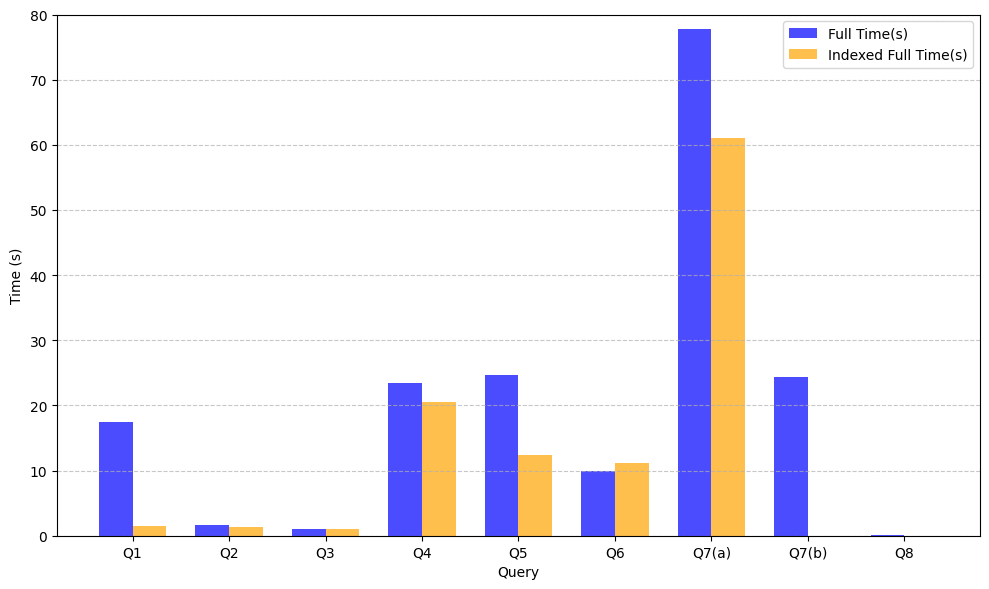

In [29]:
# 设置图形参数
x = np.arange(len(df.index))  # x轴位置
bar_width = 0.35  # 柱状图宽度

# 创建分组柱状图
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, df2["Full Time(s)"], bar_width, label="Full Time(s)", color="blue", alpha=0.7)
plt.bar(x + bar_width / 2, df2["Indexed Full Time(s)"], bar_width, label="Indexed Full Time(s)", color="orange", alpha=0.7)

# 添加标签和标题
plt.xlabel("Query")
plt.ylabel("Time (s)")
# plt.title("Comparison of non_Indexed Query and Indexed Query Time Cost")
plt.xticks(x, df2.index)
plt.ylim(0, 80)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 展示图形
plt.tight_layout()
plt.show()

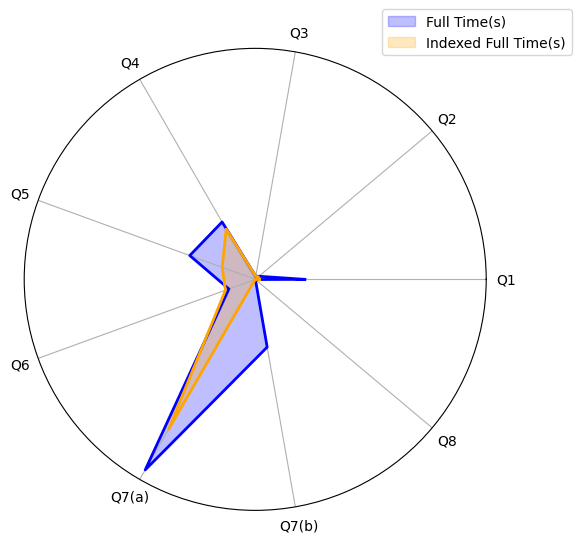

In [28]:
# 数据准备
labels = df2.index.tolist()
full_times = df2["Full Time(s)"].tolist()
indexed_times = df2["Indexed Full Time(s)"].tolist()

# 转换为雷达图的角度
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 闭合雷达图
full_times += full_times[:1]
indexed_times += indexed_times[:1]
angles += angles[:1]

# 绘制雷达图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, full_times, color='blue', alpha=0.25, label='Full Time(s)')
ax.plot(angles, full_times, color='blue', linewidth=2)
ax.fill(angles, indexed_times, color='orange', alpha=0.25, label='Indexed Full Time(s)')
ax.plot(angles, indexed_times, color='orange', linewidth=2)

# 添加标签
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# 添加标题
# plt.title("Comparison of non_Indexed Query and Indexed Query Time Cost")
plt.show()